# 필요한 라이브러리 import

In [3]:
import pandas as pd
import os
import re
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from collections import defaultdict
plt.rc('font', family='Malgun Gothic') 
plt.rc('font', size=10)
warnings.filterwarnings("ignore")

# 선수의 포지션을 예측하는 모델 생성

In [4]:
# csv 파일을 불러와 데이터 프레임 생성
# 이 데이터는 선수의 포지션을 공격,미드필더,수비 세부분으로 라벨링을 한 데이터입니다.
position_df = pd.read_csv('./datas/포지션판별모델생성용데이터.csv',encoding='utf-8')

In [5]:
position_df.columns

Index(['이름', '구분', '포지션', '구단', '리그', '임대 기간', '승', '무', '패', '출장시간',
       '경기당 팀 득점/90', '경기당 팀 실점/90', '골', '도움', 'Cr C/A', '헤더 시도', 'Cr A',
       'FA', 'Fls', '경기 당 드리블', '드리블', '기회 창출/90', '경기당 유효 슈팅/90', '경기당 슈팅/90',
       'Int/90', '달린 거리/90분', '공중 A/90', '경기당 헤더 성공', '태클 성공률', '태클',
       '경기당 패스 시도/90', '경기당 패스 성공/90', 'K Ps/90'],
      dtype='object')

In [6]:
position_df['승'].dtypes == 'int64'

True

In [7]:
use_col = ['이름', '구분', '경기 당 드리블', '기회 창출/90', '경기당 유효 슈팅/90',
       '경기당 슈팅/90', 'Int/90', '공중 A/90', '경기당 헤더 성공', '태클', '경기당 패스 시도/90',
       '경기당 패스 성공/90', 'K Ps/90']

In [8]:
# 필요한 행만 추출
position_df = position_df[use_col]

position_df = position_df.drop(index = position_df[position_df['구분'].isna()].index)

position_df = position_df.reset_index(drop=True)

In [9]:
def position_label(x):
    if x == '미드필더':
        return 0
    
    elif x == '수비수':
        return 1
    
    else:
        return 2
    

position_df['구분'] = position_df['구분'].map(position_label)

## RandomForest

In [10]:
split_count = 10

X,Y = position_df.iloc[:,2:],position_df.loc[:,'구분']

kf = KFold(n_splits= split_count)
kf.get_n_splits(X)

rf_model_list = []
rf_acc_score_list = []

for train_index, test_index in kf.split(X):

    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    created_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123).fit(x_train, y_train)
    
    pred = created_model.predict(x_test)
    
    rf_acc_score_list.append(accuracy_score(y_test, pred))
        
    rf_model_list.append(created_model)

In [11]:
rf_model_list

[RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123),
 RandomForestClassifier(oob_score=True, random_state=123)]

In [12]:
rf_acc_score_list

[0.88, 0.9, 0.92, 0.8, 0.78, 0.86, 0.9, 0.94, 0.84, 0.8]

In [13]:
np.mean(rf_acc_score_list)

0.8620000000000001

## XGBoost

In [14]:
from xgboost import XGBClassifier

In [15]:
split_count = 10

X,Y = position_df.iloc[:,2:],position_df.loc[:,'구분']

kf = KFold(n_splits= split_count)
kf.get_n_splits(X)

xg_model_list = []
xg_acc_score_list = []

for train_index, test_index in kf.split(X):

    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    created_model = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=4).fit(x_train, y_train)
    
    pred = created_model.predict(x_test)
    
    xg_acc_score_list.append(accuracy_score(y_test, pred))
        
    xg_model_list.append(created_model)

[11:30:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

In [16]:
xg_acc_score_list

[0.8, 0.92, 0.92, 0.8, 0.76, 0.82, 0.84, 0.88, 0.8, 0.82]

In [17]:
np.mean(xg_acc_score_list)

0.836

## LightGBM

In [18]:
from lightgbm import LGBMClassifier
split_count = 10

X,Y = position_df.iloc[:,2:],position_df.loc[:,'구분']

kf = KFold(n_splits= split_count)
kf.get_n_splits(X)

lg_model_list = []
lg_acc_score_list = []

for train_index, test_index in kf.split(X):

    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    created_model = LGBMClassifier(n_estimators=500,learning_rate=0.1,max_depth=4).fit(x_train, y_train)
    
    pred = created_model.predict(x_test)
    
    lg_acc_score_list.append(accuracy_score(y_test, pred))
        
    lg_model_list.append(created_model)

In [19]:
lg_acc_score_list

[0.78, 0.92, 0.9, 0.8, 0.8, 0.86, 0.86, 0.8, 0.82, 0.84]

In [20]:
np.mean(lg_acc_score_list)

0.8380000000000001

In [21]:
# 예측모델 저장
joblib.dump(rf_model_list[7],'./models/position_model.pkl')

['./models/position_model.pkl']

In [22]:
# 실제 나의 생각과 예측된 포지션을 비교
real_predicted = rf_model_list[7].predict(position_df.iloc[:,2:])
position_df['예측 포지션'] = real_predicted

In [23]:
def position_label_reverse(x):
    if x == 0:
        return '미드필더'
    
    elif x == 1:
        return '수비수'
    
    else:
        return '공격수'



position_df['예측 포지션'] = position_df['예측 포지션'].map(position_label_reverse)
position_df['구분'] = position_df['구분'].map(position_label_reverse)

In [24]:
position_df[position_df['구분']!=position_df['예측 포지션']]

,이름,구분,경기 당 드리블,기회 창출/90,경기당 유효 슈팅/90,경기당 슈팅/90,Int/90,공중 A/90,경기당 헤더 성공,태클,경기당 패스 시도/90,경기당 패스 성공/90,K Ps/90,예측 포지션
357,Jack Cork,수비수,0.05,0.35,0.25,0.69,0.99,4.6,2.23,1.83,48.39,43.79,1.48,미드필더
384,Oriol Romeu,수비수,0.21,0.55,0.10,0.27,0.82,4.8,3.36,1.88,51.99,46.95,1.30,미드필더
399,Julian Draxler,공격수,2.08,0.36,0.36,1.67,1.77,5.0,3.18,1.09,35.62,30.94,1.61,미드필더


In [25]:
rf_model_list[7].feature_importances_

array([0.06363021, 0.02359853, 0.08850386, 0.07989654, 0.05073648,
       0.07161284, 0.12032953, 0.04832528, 0.13965178, 0.17767731,
       0.13603765])

In [26]:
feature_importance_dict = defaultdict(float)

for feature,importance in zip(list(position_df.columns[2:-1]),rf_model_list[7].feature_importances_):
    feature_importance_dict[feature] = importance
    
feature_importance_dict

defaultdict(float,
            {'경기 당 드리블': 0.06363020686876338,
             '기회 창출/90': 0.02359852893761634,
             '경기당 유효 슈팅/90': 0.08850385632872702,
             '경기당 슈팅/90': 0.07989653674737601,
             'Int/90': 0.05073648320283441,
             '공중 A/90': 0.07161283635770281,
             '경기당 헤더 성공': 0.12032952966160054,
             '태클': 0.04832528184934347,
             '경기당 패스 시도/90': 0.13965178137554163,
             '경기당 패스 성공/90': 0.17767730712044397,
             'K Ps/90': 0.1360376515500504})

In [27]:
sorted(feature_importance_dict.items(),key=lambda x : x[1], reverse=True)

[('경기당 패스 성공/90', 0.17767730712044397),
 ('경기당 패스 시도/90', 0.13965178137554163),
 ('K Ps/90', 0.1360376515500504),
 ('경기당 헤더 성공', 0.12032952966160054),
 ('경기당 유효 슈팅/90', 0.08850385632872702),
 ('경기당 슈팅/90', 0.07989653674737601),
 ('공중 A/90', 0.07161283635770281),
 ('경기 당 드리블', 0.06363020686876338),
 ('Int/90', 0.05073648320283441),
 ('태클', 0.04832528184934347),
 ('기회 창출/90', 0.02359852893761634)]

<Figure size 720x720 with 0 Axes>

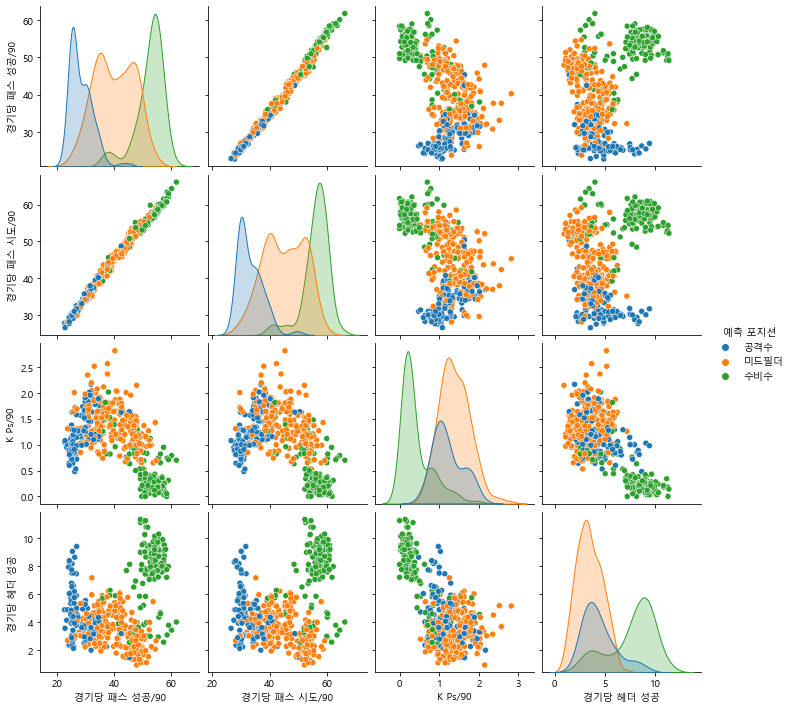

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(position_df[['경기당 패스 성공/90','경기당 패스 시도/90','K Ps/90','경기당 헤더 성공','예측 포지션']],hue='예측 포지션')
plt.show()

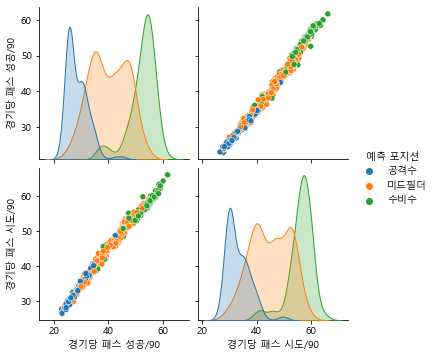

In [31]:
sns.pairplot(position_df[['경기당 패스 성공/90','경기당 패스 시도/90','예측 포지션']],hue='예측 포지션')

In [39]:
pre_forward_df = position_df[position_df['예측 포지션'] == '공격수']

In [40]:
pre_forward_df[pre_forward_df['경기당 패스 성공/90']>40]

,이름,구분,경기 당 드리블,기회 창출/90,경기당 유효 슈팅/90,경기당 슈팅/90,Int/90,공중 A/90,경기당 헤더 성공,태클,경기당 패스 시도/90,경기당 패스 성공/90,K Ps/90,예측 포지션
332,Phil Foden,공격수,0.99,0.46,0.97,2.33,1.18,3.25,1.45,1.43,50.45,45.38,1.64,공격수
457,Kai Havertz,공격수,1.15,0.29,0.97,2.14,1.40,5.03,3.18,1.05,48.74,42.52,1.63,공격수


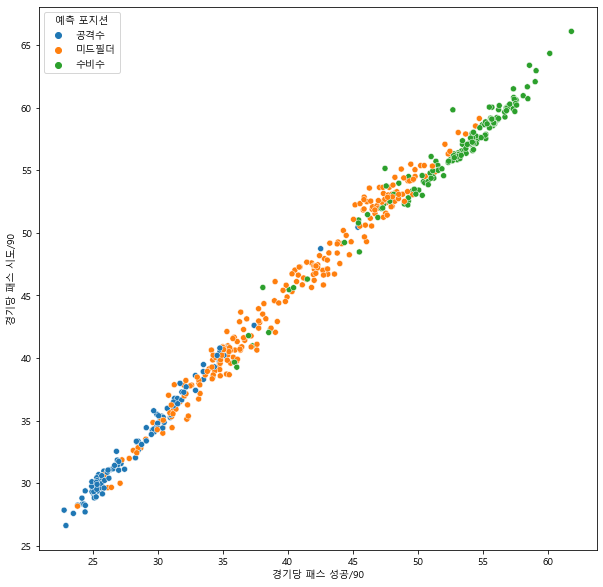

In [35]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=position_df[['경기당 패스 성공/90','경기당 패스 시도/90','예측 포지션']],x='경기당 패스 성공/90',y='경기당 패스 시도/90',hue='예측 포지션')

plt.show()

In [53]:
import os
import re

# 초기 데이터 위치(포지션 판정)
data_path = './datas/NEW_FM_DATA'

# 변환된 데이터 위치
target_path = './datas/NEW_FM_DATA_MERGED'

# NEW_FM_DATA 내의 목록 가져오기
folder_list = os.listdir(data_path)

# 시즌을 추출할 정규표현식(숫자)
season_re = re.compile('\d+')

# 리그를 추출할 정규표현식(영어+숫자) 예) 프랑스 Ligue1
league_re = re.compile('[a-zA-Z]+')


# 매 폴더를 돌며
for folder in folder_list:

    # 상위경로와 하위 경로를 병합할 변수
    sub_path = ''

    # 폴더명으로 새 경로를 생성
    sub_path = os.path.join(data_path,folder)
    
    sub_folder_list = os.listdir(sub_path)
    
    for sub_folder in sub_folder_list:
        
        sub_sub_path = os.path.join(data_path,folder,sub_folder)

        # 시즌을 추출
        season = season_re.findall(folder)
        
        season = season[0] + '-' + season[1]

        # 리그를 추출
        league = league_re.findall(sub_folder)
        
        #print(target_path,season,league)
        
        csv_path = target_path+'/'+season+'/'+ season+'-'+league[0]+ '.csv'
        
        print(csv_path)
       

./datas/NEW_FM_DATA_MERGED/2021-2022/2021-2022-BundesLiga.csv
./datas/NEW_FM_DATA_MERGED/2021-2022/2021-2022-LaLiga.csv
./datas/NEW_FM_DATA_MERGED/2021-2022/2021-2022-LigueOne.csv
./datas/NEW_FM_DATA_MERGED/2021-2022/2021-2022-PremierLeague.csv
./datas/NEW_FM_DATA_MERGED/2021-2022/2021-2022-SerieA.csv
./datas/NEW_FM_DATA_MERGED/2022-2023/2022-2023-BundesLiga.csv
./datas/NEW_FM_DATA_MERGED/2022-2023/2022-2023-LaLiga.csv
./datas/NEW_FM_DATA_MERGED/2022-2023/2022-2023-LigueOne.csv
./datas/NEW_FM_DATA_MERGED/2022-2023/2022-2023-PremierLeague.csv
./datas/NEW_FM_DATA_MERGED/2022-2023/2022-2023-SerieA.csv
./datas/NEW_FM_DATA_MERGED/2023-2024/2023-2024-BundesLiga.csv
./datas/NEW_FM_DATA_MERGED/2023-2024/2023-2024-LaLiga.csv
./datas/NEW_FM_DATA_MERGED/2023-2024/2023-2024-LigueOne.csv
./datas/NEW_FM_DATA_MERGED/2023-2024/2023-2024-PremierLeague.csv
./datas/NEW_FM_DATA_MERGED/2023-2024/2023-2024-SerieA.csv
